<a href="https://colab.research.google.com/github/krishna574ML/ABS_Prediction/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df = pd.read_csv('economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.2 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24.0,11.500000,7.071068,0.00,5.75,11.50,17.25,23.00
year,24.0,2016.500000,0.510754,2016.00,2016.00,2016.50,2017.00,2017.00
month,24.0,6.500000,3.526299,1.00,3.75,6.50,9.25,12.00
interest_rate,24.0,2.072917,0.349527,1.75,1.75,2.00,2.50,2.75
unemployment_rate,24.0,5.775000,0.330020,5.30,5.50,5.85,6.10,6.20
index_price,24.0,1070.083333,210.735341,704.00,928.25,1061.00,1239.00,1464.00


In [20]:
df.drop(columns=['year' ,'month'] , axis=1 , inplace = True)

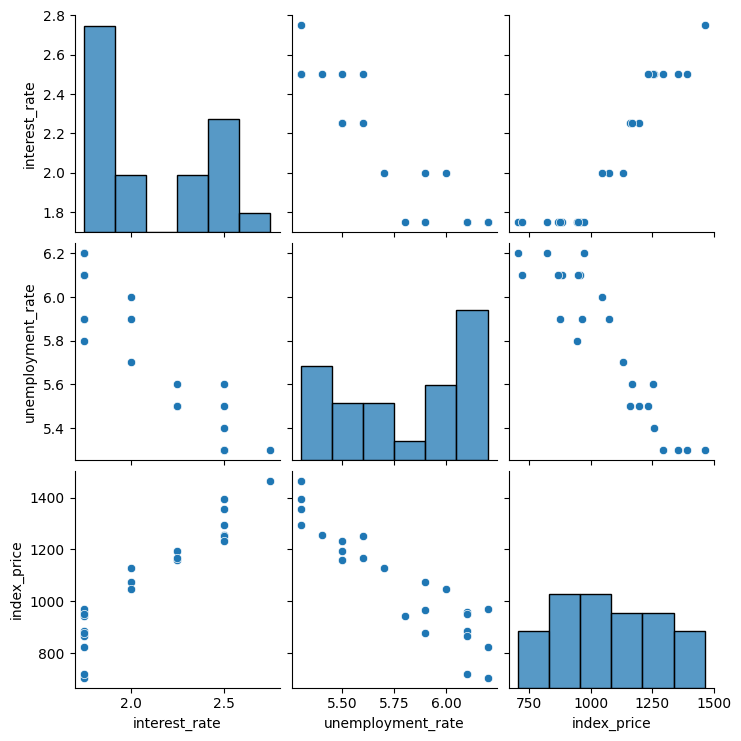

In [22]:
sns.pairplot(df)
plt.show()

In [23]:
df.corr() ## in this rows and columns the correlation b/w each feature is describe
#If intrest rate in

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Describing the Relationships
Interest Rate and Unemployment Rate:

Correlation: -0.925814
Description: There is a strong negative correlation between interest_rate and unemployment_rate. This implies that as the interest_rate increases, the unemployment_rate tends to decrease, and vice versa.
Interest Rate and Index Price:

Correlation: 0.935793
Description: There is a strong positive correlation between interest_rate and index_price. This suggests that as the interest_rate increases, the index_price tends to increase as well.
Unemployment Rate and Index Price:

Correlation: -0.922338
Description: There is a strong negative correlation between unemployment_rate and index_price. This indicates that as the unemployment_rate increases, the index_price tends to decrease.

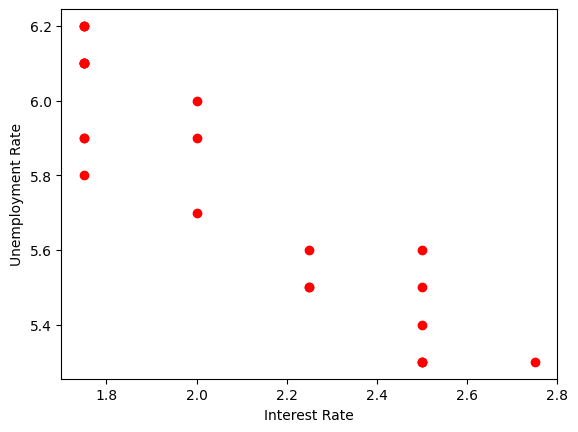

In [25]:
# Understand the data what it is trying to visualize

plt.scatter(df['interest_rate'] , df['unemployment_rate'] , color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.show()

In [26]:
X = df.drop('index_price' , axis=1)

In [27]:
y = df['index_price']

In [29]:
y.shape

(24,)

In [30]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=41)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train , y_train)




LinearRegression()

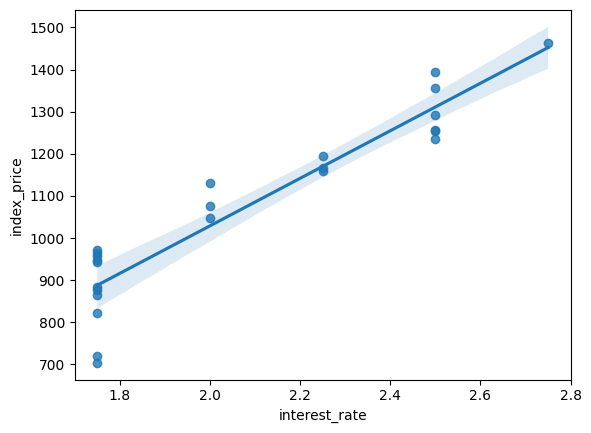

In [33]:
sns.regplot(x='interest_rate' , y='index_price' , data=df)
plt.show()

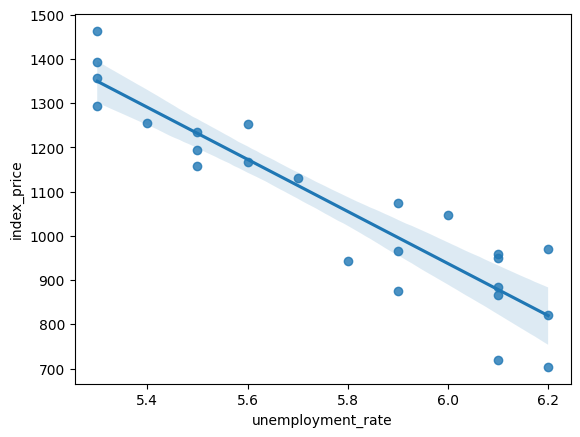

In [34]:
sns.regplot(x='unemployment_rate' , y='index_price' , data=df)
plt.show()

In [36]:
y_pred = reg.predict(X_test)

In [37]:
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
r2 = r2_score(y_test,y_pred)
mean_squared_error(y_test,y_pred)
mean_absolute_error(y_test,y_pred)



34.76382795522577

In [38]:

print(f"R sqaured {r2}") ## Close to 1 is best model
print(f"Mean squared error {mean_squared_error(y_test,y_pred)}")
print(f"Mean absolute error {mean_absolute_error(y_test,y_pred)}")

R sqaured 0.8282817998964929
Mean squared error 2835.507082301168
Mean absolute error 34.76382795522577
